In [12]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed=3
np.random.seed(seed)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input, concatenate

In [2]:
labels_df = pd.read_csv('product_attributes_updated.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')

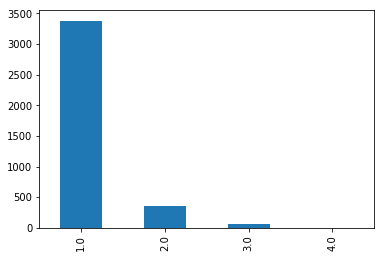

In [3]:
for ColumnName in ['Tier']:
    labels_df[ColumnName].value_counts().plot(kind="bar")
    plt.show()

In [4]:
 def image2np_array( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

x_train_list=[]
y_train_list=[]

one_hot=pd.get_dummies(labels_df['Tier'])

for row in labels_df.itertuples():
    if pd.notnull(row[17]):
        try:
            img = image2np_array('..\\ml_150x150_m\\'+row[1]+'.jpg').reshape(150,150,1)
        except IOError:
            continue
        x_train_list.append(img)
        y_train_list.append(one_hot.loc[row[0],:].values)

In [5]:
x_train=np.array(x_train_list)
y_train=np.array(y_train_list)

In [14]:
epochs = 5
batch_size = 32

input_img = Input(shape=(150, 150, 1))


x=Conv2D(32,(5,5), activation='relu')(input_img)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

x=Conv2D(32,(5,5), activation='relu')(x)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

x=Conv2D(32,(5,5), activation='relu')(x)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

tower_1 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
tower_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
tower_2 = Conv2D(32, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
tower_3 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_3)

aux_output1 = concatenate([tower_1, tower_2, tower_3], axis=1)

features=Flatten()(aux_output1)

x = Dense(64, activation='relu')(features)
x = Dense(64, activation='relu')(x)
output3=Dense(4, activation='softmax')(x)
 
end_model = Model(inputs=input_img, outputs=output3)
end_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
end_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 150, 150, 1)   0                                            
____________________________________________________________________________________________________
conv2d_34 (Conv2D)               (None, 146, 146, 32)  832         input_4[0][0]                    
____________________________________________________________________________________________________
conv2d_35 (Conv2D)               (None, 142, 142, 32)  25632       conv2d_34[0][0]                  
____________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D)  (None, 71, 71, 32)    0           conv2d_35[0][0]                  
___________________________________________________________________________________________

In [15]:
end_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 3053 samples, validate on 764 samples
Epoch 1/5
3053/3053 [==============================] - 14s - loss: 2.1653 - acc: 0.8592 - val_loss: 0.7384 - val_acc: 0.9542
Epoch 2/5
3053/3053 [==============================] - 10s - loss: 2.1329 - acc: 0.8677 - val_loss: 0.7384 - val_acc: 0.9542
Epoch 3/5
3053/3053 [==============================] - 10s - loss: 2.1329 - acc: 0.8677 - val_loss: 0.7384 - val_acc: 0.9542
Epoch 4/5
3053/3053 [==============================] - 10s - loss: 2.1329 - acc: 0.8677 - val_loss: 0.7384 - val_acc: 0.9542
Epoch 5/5
3053/3053 [==============================] - 10s - loss: 2.1329 - acc: 0.8677 - val_loss: 0.7384 - val_acc: 0.9542


In [16]:
end_model.save('Tier_classifier.h5')